In [23]:
#Uses pillow (you can also use another imaging library if you want)
from PIL import Image, ImageFont, ImageDraw

#Load the font and set the font size to 42
font = ImageFont.truetype('Habbakuk.ttf', 42)

#Character mapping for each of the 27 tokens
char_map = {'Alef' : ')', 
            'Ayin' : '(', 
            'Bet' : 'b', 
            'Dalet' : 'd', 
            'Gimel' : 'g', 
            'He' : 'x', 
            'Het' : 'h', 
            'Kaf' : 'k', 
            'Kaf-final' : '\\', 
            'Lamed' : 'l', 
            'Mem' : '{', 
            'Mem-medial' : 'm', 
            'Nun-final' : '}', 
            'Nun-medial' : 'n', 
            'Pe' : 'p', 
            'Pe-final' : 'v', 
            'Qof' : 'q', 
            'Resh' : 'r', 
            'Samekh' : 's', 
            'Shin' : '$', 
            'Taw' : 't', 
            'Tet' : '+', 
            'Tsadi-final' : 'j', 
            'Tsadi-medial' : 'c', 
            'Waw' : 'w', 
            'Yod' : 'y', 
            'Zayin' : 'z'}

#Returns a grayscale image based on specified label of img_size
def create_image(label, img_size):
    if (label not in char_map):
        raise KeyError('Unknown label!')

    #Create blank image and create a draw interface
    img = Image.new('L', img_size, 255)    
    draw = ImageDraw.Draw(img)

    #Get size of the font and draw the token in the center of the blank image
    w,h = font.getsize(char_map[label])
    print(char_map[label])
    draw.text(((0), (0)), char_map[label], 0, font)

    draw.text(((img_size[0]-w)/2, (img_size[1]-h)/2), char_map[label], 0, font)

    return img

#Create a 50x50 image of the Alef token and save it to disk
#To get the raw data cast it to a numpy array
img = create_image('Alef', (50, 50))
img.save('example_alef.png')

)


C:\Users\danie\AppData\Local\Temp\ipykernel_52704\802009922.py:46: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  w,h = font.getsize(char_map[label])


27

C:\Users\danie\AppData\Local\Temp\ipykernel_11124\502080938.py:28: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  w,h = font.getsize(character)


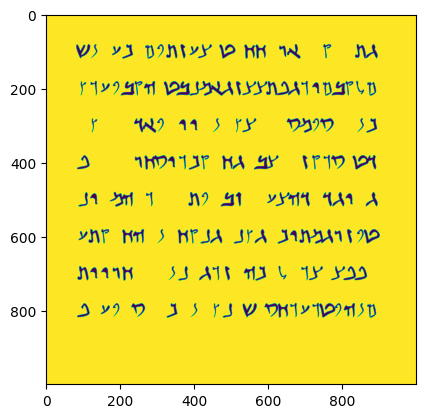

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt

def create_word_page():

    numCharacters = len(char_map)


    #Create blank image and create a draw interface
    img_size = (1000, 1000)
    img = Image.new('L', img_size, 255)    
    draw = ImageDraw.Draw(img)

    rows = np.arange(100,1000-100,100)
    cols = np.arange(100,1000-100,30)

    character_set = list(char_map.values())

    for row in rows:
        for col in cols:

            if random.random() > 0.3:

                character = random.choice(character_set)

                #Get size of the font and draw the token in the center of the blank image
                w,h = font.getsize(character)
                #print(w,h)
                position = (col - (w/2), row - (h/2) )
                draw.text(position, character, 0, font)

    return img

img = create_word_page()
plt.imshow(img)
#img.save('output1.png')

C:\Users\danie\AppData\Local\Temp\ipykernel_52704\2709186110.py:44: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  w,h = font.getsize(character)


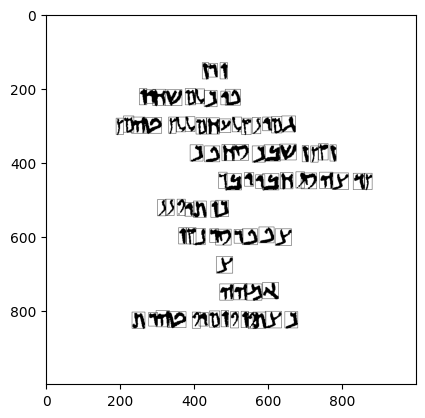

In [64]:
import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import ImageFilter, ImageChops 
import cv2
from PIL import Image, ImageDraw

def create_word_page2():
    # a list that contains the BB coordinates [x1, y1, x2, y2] for each letter
    BB = []

    fontSize = random.randint(35, 50)
    font = ImageFont.truetype('Habbakuk.ttf', fontSize)

    widthNoise = 3
    heightNoise = 3
    spacingNoise = 5


    #Create blank image and create a draw interface
    img_size = (1000, 1000)
    img = Image.new('L', img_size, 255) 

    whiteImage = Image.new('L', img_size, 255)  

    draw = ImageDraw.Draw(img)

    rows = np.arange(150,900,75)  # rows are 75 pixels apart
    colStart = list(np.arange(200,500,10))
    colEnd = list(np.arange(500,910,10))

    character_set = list(char_map.values())

    for row in rows:
        #for col in cols:
        col = random.choice(colStart)
        endColumn = random.choice(colEnd)

        while col < endColumn:

            if random.random() > 0.4: # 40% of no letter = space in the sentence
                # pick a character randomly, get its dimensions
                character = random.choice(character_set)
                w,h = font.getsize(character)

                # set its position, with a bit of noise (position is the top-left corner pixel of the letter's BB)
                position = (col - (w/2) + random.randint(-widthNoise, widthNoise), row - (h/2) + random.randint(-heightNoise, heightNoise) )
                draw.text(position, character, 0, font)

                col += w + random.randint(0, spacingNoise)

                BB.append([position[0], position[1], position[0]+w, position[1]+h])

    # to make the image grainy, use this mask. p is the probability that each pixel is made to be white (hence removing parts of the letters)
    #N = img_size[0]
    p = 0.5
    mask = np.random.rand(img_size[0], img_size[1]) > p
    mask = Image.fromarray(mask)

    img = ImageChops.composite(img, whiteImage, mask) 


    
    # convert to cv2 image to do morpological operations
    # these operations make the image look much more similar to the dead sea scrolls (in terms of image quality)
    img = np.array(img) 
    
    kernel = np.ones((2, 2), np.uint8)
    img = cv2.erode(img,kernel,iterations = 2)
    kernel = np.ones((3, 3), np.uint8)
    img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

    ret, img = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU)
    
    #cv2.imwrite('blurry.png', img)                 
    """ Revisit the filetype when saving these images"""
    img = Image.fromarray(img)

    """remove this later;  """
    for bb in BB:
        img1 = ImageDraw.Draw(img)
        img1.rectangle(bb)


    return img

img = create_word_page2()
plt.imshow(img, cmap='gray')
plt.show()



img.save('blurry.png')

C:\Users\danie\AppData\Local\Temp\ipykernel_32496\379750314.py:15: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  w,h = font.getsize(character)


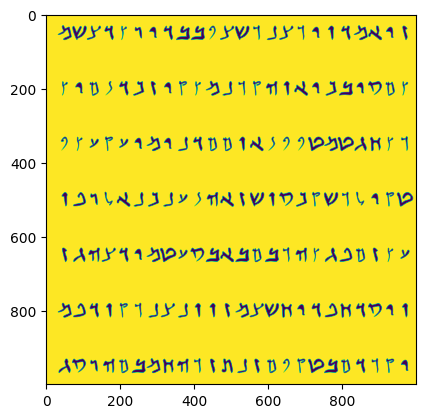

In [105]:
#Create blank image and create a draw interface
img_size = (1000, 1000)
img = Image.new('L', img_size, 255)    
draw = ImageDraw.Draw(img)

rows = np.arange(50,1000,150)
cols = np.arange(50,1000,40)

for row in rows:
    for col in cols:

        character = random.choice(list(char_map.values()))

        #Get size of the font and draw the token in the center of the blank image
        w,h = font.getsize(character)
        #print(w,h)
        position = (col - (w/2), row - (h/2) )
        draw.text(position, character, 0, font)

        #draw.text(((img_size[0]-w)/2, (img_size[1]-h)/2), character, 0, font)


plt.imshow(img)

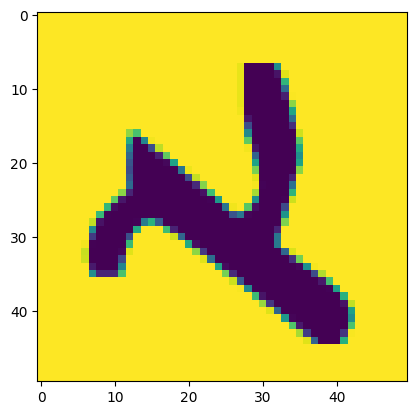

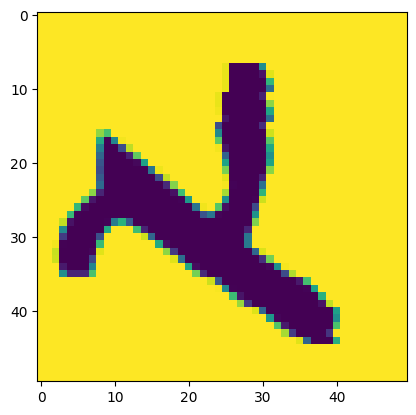

In [27]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt

img = cv2.imread('example_alef.png', cv2.IMREAD_GRAYSCALE)
rows, cols = img.shape


img_output = np.ones(img.shape, dtype=img.dtype)
for warp in [0, 5]:
    for i in range(rows):
        for j in range(cols):
            offset_x = int(warp * math.sin(2 * 3.14 * i / (2*cols)))
            offset_y = 0
            if 0 <= j+offset_x < cols:
                img_output[i,j] = img[i,(j+offset_x)%cols]
            else:
                img_output[i,j] = 255


    plt.imshow(img_output)
    plt.show()


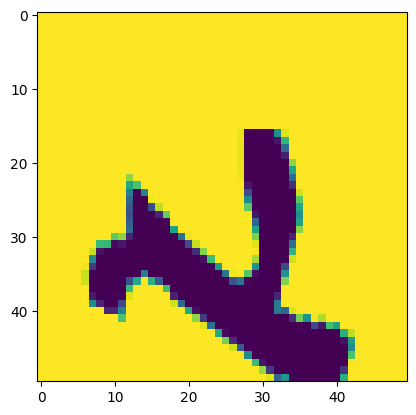

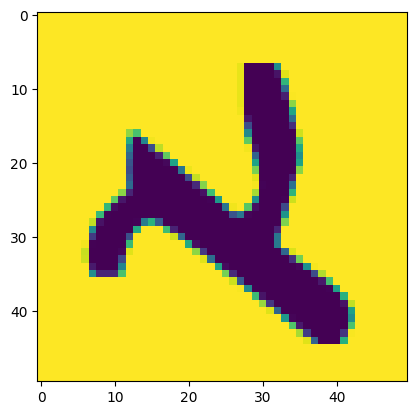

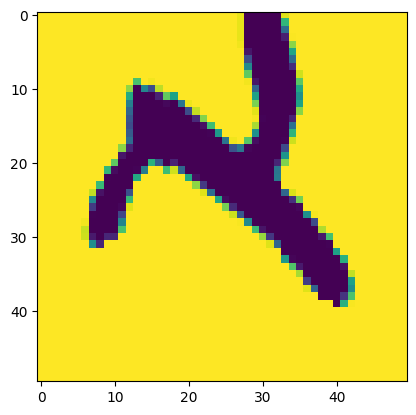

In [24]:

img_output = np.ones(img.shape, dtype=img.dtype)

for warp in [-10, 0, 10]:
    for i in range(rows):
        for j in range(cols):
            offset_x = 0
            offset_y = int(warp * math.sin(2 * 3.14 * j / (2*rows)))
            if 0 <= i+offset_y < rows:
                img_output[i,j] = img[(i+offset_y)%rows, (j+offset_x)%cols]
            else:
                img_output[i,j] = 255


    plt.imshow(img_output)
    plt.show()

### This doesn't work :(

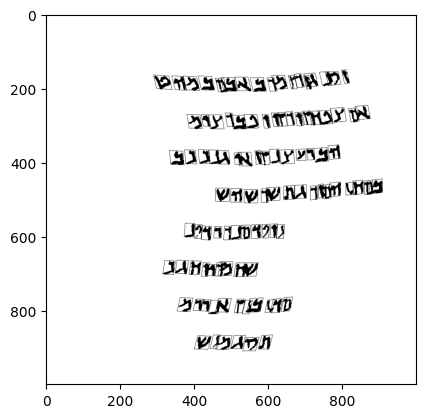

True

In [58]:
import math
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import Image

img = cv2.imread('blurry.png', cv2.IMREAD_GRAYSCALE)


def imageWarper(img):
    rows, cols = img.shape

    warp_factors = list(np.arange(-100,101,5))


    horizontalWarpFactor = random.choice(warp_factors)
    verticalWarpFactor = random.choice(warp_factors)

    img_output = np.ones(img.shape, dtype=img.dtype) * 255


    #horizontalWarpFactor = 0
    #verticalWarpFactor = 100

    x_offsets = np.arange(0,cols,1)
    x_offsets = [int(horizontalWarpFactor * math.sin(2 * 3.14 * x_coord / (cols*2))) for x_coord in np.arange(0,cols,1)] 
    y_offsets = [int(verticalWarpFactor * math.sin(2 * 3.14 * y_coord / (rows*2))) for y_coord in np.arange(0,rows,1)] 


    for i in range(rows):
        for j in range(cols):
            #offset_x = 0
            #  offset_x = int(horizontalWarpFactor * math.sin(2 * 3.14 * i / (2*cols)))
            #  offset_y = int(verticalWarpFactor * math.sin(2 * 3.14 * j / (2*rows)))
            #offset_y = int(warp * math.sin(2 * 3.14 * j / (rows*2)))
            #offset_y= 0

            offset_x = x_offsets[i]
            offset_y = y_offsets[j]

            # if still within the image, move the pixel value, otherwise, the output image is white anyway (255 value)
            if 0 <= i+offset_y < rows  and   0 <= j+offset_x < cols:
                img_output[i,j] = img[(i+offset_y)%rows, (j+offset_x)%cols]

    return img_output


img_output = imageWarper(img)


plt.imshow(img_output, cmap='gray')
plt.show()
cv2.imwrite("WARPED.png", img_output)

In [59]:
img_output

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

# SINGLE CHARCTER IMAGES

In [231]:
#Uses pillow (you can also use another imaging library if you want)
from PIL import Image, ImageFont, ImageDraw
import cv2

#Load the font and set the font size to 42
font = ImageFont.truetype('Habbakuk.ttf', 42)

#Character mapping for each of the 27 tokens
char_map = {'Alef' : ')', 
            'Ayin' : '(', 
            'Bet' : 'b', 
            'Dalet' : 'd', 
            'Gimel' : 'g', 
            'He' : 'x', 
            'Het' : 'h', 
            'Kaf' : 'k', 
            'Kaf-final' : '\\', 
            'Lamed' : 'l', 
            'Mem' : '{', 
            'Mem-medial' : 'm', 
            'Nun-final' : '}', 
            'Nun-medial' : 'n', 
            'Pe' : 'p', 
            'Pe-final' : 'v', 
            'Qof' : 'q', 
            'Resh' : 'r', 
            'Samekh' : 's', 
            'Shin' : '$', 
            'Taw' : 't', 
            'Tet' : '+', 
            'Tsadi-final' : 'j', 
            'Tsadi-medial' : 'c', 
            'Waw' : 'w', 
            'Yod' : 'y', 
            'Zayin' : 'z'}

#Returns a grayscale image based on specified label of img_size
def create_letter_image(label, img_size):
    font = ImageFont.truetype('Habbakuk.ttf', random.randint(30, 45))

    #Create blank image and create a draw interface
    img = Image.new('L', img_size, 255)    
    draw = ImageDraw.Draw(img)

    translation_factor = 5
    horzontal_translation = random.randint(-translation_factor, translation_factor)
    vertical_translation = random.randint(-translation_factor, translation_factor)

    #Get size of the font and draw the token in the center of the blank image
    w,h = font.getsize(char_map[label])
    draw.text(((img_size[0]-w)/2 + horzontal_translation, (img_size[1]-h)/2+vertical_translation), char_map[label], 0, font)


    img = np.array(img) 

     
    if random.random() > 0.4:
        kernel = np.ones((2, 2), np.uint8)
        img = cv2.erode(img,kernel,iterations = 1)  # erode the image (makes the black letters wider)
    if random.random() > 0.4:
        kernel = np.ones((3, 3), np.uint8)
        img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    ret, img = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU)

    return img



C:\Users\danie\AppData\Local\Temp\ipykernel_13584\1990221161.py:52: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  w,h = font.getsize(char_map[label])


Alef
Alef
Alef
Alef
Alef
Alef
Alef
Alef
Alef
Alef
Ayin
Ayin
Ayin
Ayin
Ayin
Ayin
Ayin
Ayin
Ayin
Ayin
Bet
Bet
Bet
Bet
Bet
Bet
Bet
Bet
Bet
Bet
Dalet
Dalet
Dalet
Dalet
Dalet
Dalet
Dalet
Dalet
Dalet
Dalet
Gimel
Gimel
Gimel
Gimel
Gimel
Gimel
Gimel
Gimel
Gimel
Gimel
He
He
He
He
He
He
He
He
He
He
Het
Het
Het
Het
Het
Het
Het
Het
Het
Het
Kaf
Kaf
Kaf
Kaf
Kaf
Kaf
Kaf
Kaf
Kaf
Kaf
Kaf-final
Kaf-final
Kaf-final
Kaf-final
Kaf-final
Kaf-final
Kaf-final
Kaf-final
Kaf-final
Kaf-final
Lamed
Lamed
Lamed
Lamed
Lamed
Lamed
Lamed
Lamed
Lamed
Lamed
Mem
Mem
Mem
Mem
Mem
Mem
Mem
Mem
Mem
Mem
Mem-medial
Mem-medial
Mem-medial
Mem-medial
Mem-medial
Mem-medial
Mem-medial
Mem-medial
Mem-medial
Mem-medial
Nun-final
Nun-final
Nun-final
Nun-final
Nun-final
Nun-final
Nun-final
Nun-final
Nun-final
Nun-final
Nun-medial
Nun-medial
Nun-medial
Nun-medial
Nun-medial
Nun-medial
Nun-medial
Nun-medial
Nun-medial
Nun-medial
Pe
Pe
Pe
Pe
Pe
Pe
Pe
Pe
Pe
Pe
Pe-final
Pe-final
Pe-final
Pe-final
Pe-final
Pe-final
Pe-final
Pe-final
Pe-final

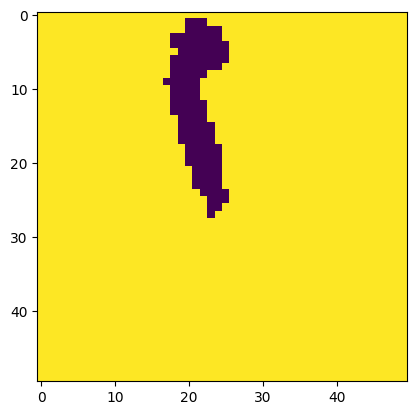

In [240]:
def HabbakukLettersGenerator(path, N=100):
    targetLabels = []
    for labelIDX in range(len(list(char_map))):
        label = list(char_map)[labelIDX]

        for n in range(N):

            img = create_image(label, (50, 50))
            img = letterImageWarper(img)

            filename = str(label) + "_" + str(labelIDX) + "_" +  str(n) + ".png"

            output_image_path = os.path.join(path, filename)

            cv2.imwrite(output_image_path, img)
            print(label)

        plt.imshow(img)

import os


outputFolder = "Habbakuk_Letters"
os.makedirs(outputFolder, exist_ok = True)
    
HabbakukLettersGenerator(outputFolder, N=10)

In [177]:
import random
import math

def letterImageWarper(img):
    rows, cols = img.shape

    warp_factors = list(np.arange(-8,9,1))
    wave_lengths = list(np.arange(1,2.2,0.1))

    horizontalWarpFactor = random.choice(warp_factors)
    verticalWarpFactor = random.choice(warp_factors)
    horzWaveLength = random.choice(wave_lengths)
    vertWaveLength = random.choice(wave_lengths)

    img_output = np.ones(img.shape, dtype=img.dtype) * 255 # make a blank white image to place the warp on

    x_offsets = [int(horizontalWarpFactor * math.sin(2 * 3.14 * x_coord / (cols*horzWaveLength))) for x_coord in np.arange(0,cols,1)] 
    y_offsets = [int(verticalWarpFactor * math.sin(2 * 3.14 * y_coord / (rows*vertWaveLength))) for y_coord in np.arange(0,rows,1)] 


    for i in range(rows):
        for j in range(cols):

            offset_x = x_offsets[i] # how much to move left and right (which is based on row positon)
            offset_y = y_offsets[j] # how much to move up and down (which is based on column positon)

            # if still within the image, move the pixel value, otherwise, the output image is white anyway (255 value)
            if 0 <= i+offset_y < rows  and   0 <= j+offset_x < cols:
                img_output[i,j] = img[i+offset_y, j+offset_x]

    return img_output

C:\Users\danie\AppData\Local\Temp\ipykernel_13584\2347176586.py:50: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  w,h = font.getsize(char_map[label])


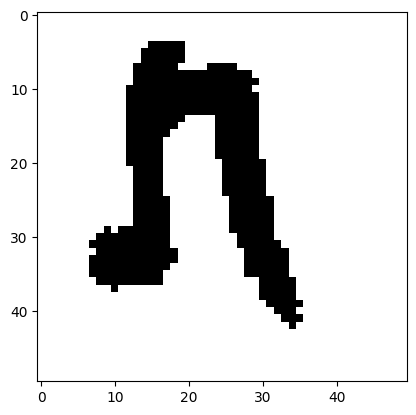

In [153]:
from habPagesGenerator import imageWarper
import numpy as np
import matplotlib.pyplot as plt

img = create_image((50, 50))
warped = letterImageWarper(img)

plt.imshow(warped, cmap='gray')